# Lab 3: Data Preprocessing

In this assignment, we will learn how to explore the raw data and preprocess it. 

The dataset we are going to explore is an insurance data. It provides different features of each user as follows:
* age: age of the user
* sex: gender of the user
* bmi: body mass index, providing an understanding of body
* children: number of children covered by health insurance / number of dependents
* smoker: smoker or not
* region: the user's residential area in the US, northeast, southeast, southwest, northwest.

Additionally, the medical cost of each user is also provided: 
* charges: the medical cost 

Please follow Lecture 5_data_understanding and Lecture 6_data_preprocessing to complete following questions. 

### Q1. Load data with Pandas and output the basic information of this dataset, such as the features and their data types.  Which features are numerical features and which features are categorical features?


In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv('insurance.csv')
print('feature     data type')
print('_______     _________')
print(df.dtypes)
print('\nAge, bmi, children, and charges are numerical features.\nSex, smoker, and region are categorical features.')

feature     data type
_______     _________
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Age, bmi, children, and charges are numerical features.
Sex, smoker, and region are categorical features.


### Q2. Check whether there are missing values in this dataset.

In [52]:
print('feature   missing values')
print('_______   ______________')
print(df.isnull().sum())

feature   missing values
_______   ______________
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


### Q3. Visualize all numerical features with histogram plot to see the distribution of each numerical feature. 


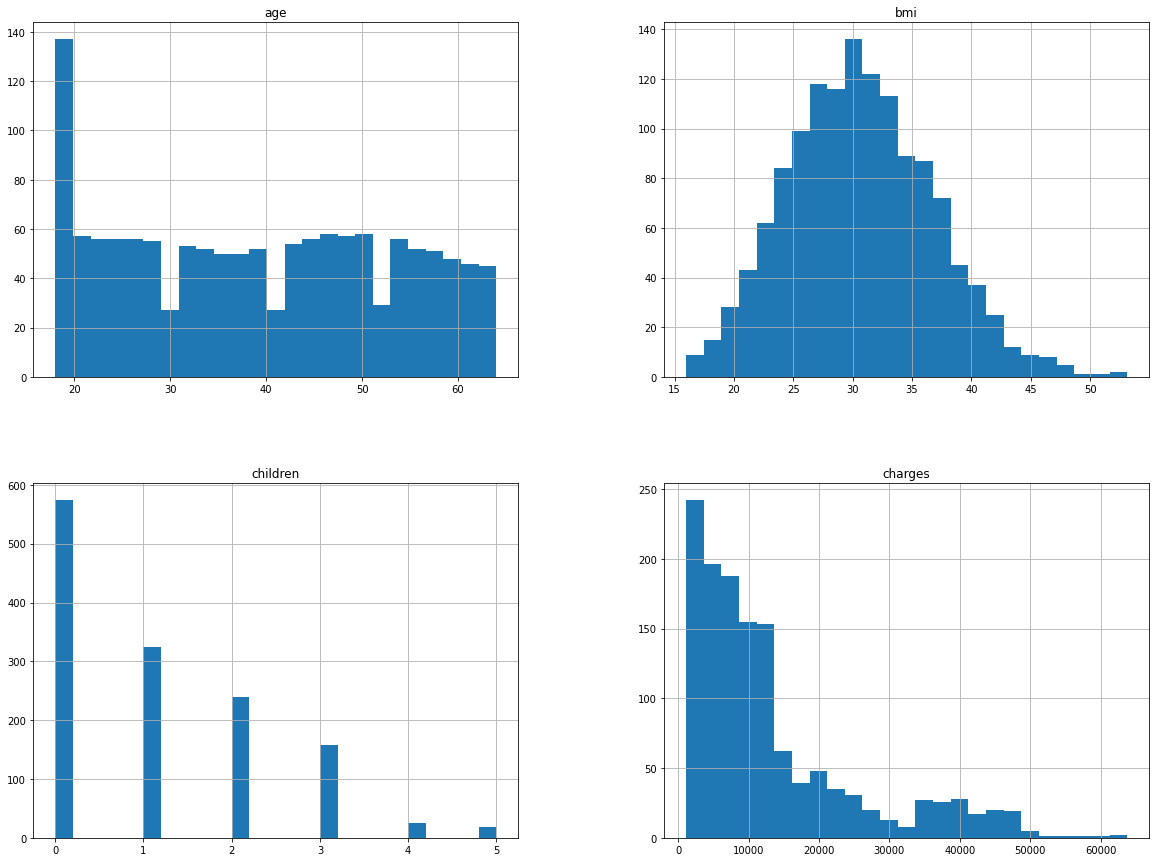

In [53]:
df.hist(bins=25, figsize=(20,15))
plt.show()

### Q4. Use corr() function of Pandas to show the correlation between different numerical features

In [54]:
dfcorr = df.corr()
dfcorr.style.background_gradient()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


### Q5. For all categorical features, use bar plot to visualize the number of users within each category.

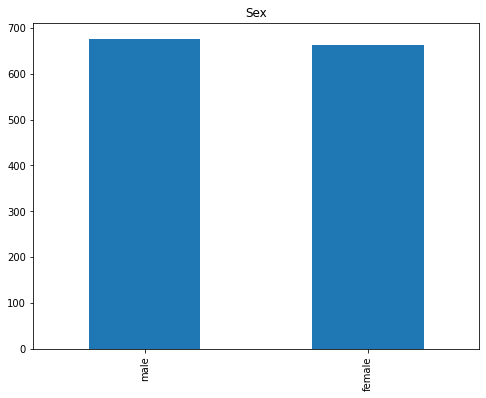

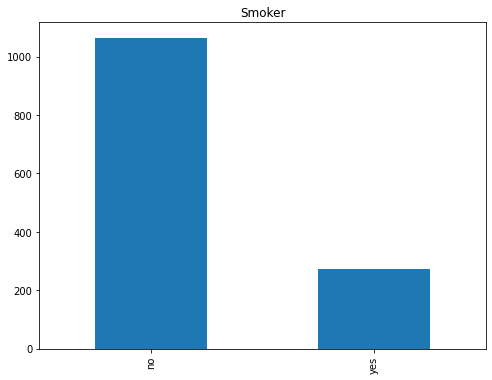

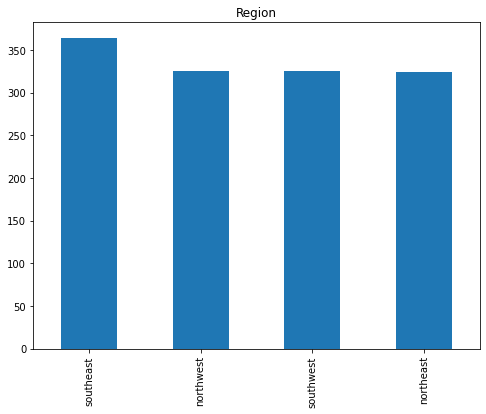

In [55]:
df['sex'].value_counts().plot(kind='bar', figsize=(8,6))
plt.title('Sex')
plt.show()
df['smoker'].value_counts().plot(kind='bar', figsize=(8,6))
plt.title('Smoker')
plt.show()
df['region'].value_counts().plot(kind='bar', figsize=(8,6))
plt.title('Region')
plt.show()

### Q6. Convert all categorical features into numerical features with Label Encoding or One-Hot Encoding

In [68]:
labelencoder = LabelEncoder()
df['sex'] = labelencoder.fit_transform(df['sex'])
df['smoker'] = labelencoder.fit_transform(df['smoker'])
df['region'] = labelencoder.fit_transform(df['region'])

### Q7. Normalize all numerical features

In [69]:
df_min = df.min(axis=0)
df_max = df.max(axis=0)
df = (df-df_min)/(df_max-df_min)
print(df)

           age  sex       bmi  children  smoker    region   charges
0     0.021739  0.0  0.321227       0.0     1.0  1.000000  0.251611
1     0.000000  1.0  0.479150       0.2     0.0  0.666667  0.009636
2     0.217391  1.0  0.458434       0.6     0.0  0.666667  0.053115
3     0.326087  1.0  0.181464       0.0     0.0  0.333333  0.333010
4     0.304348  1.0  0.347592       0.0     0.0  0.333333  0.043816
...        ...  ...       ...       ...     ...       ...       ...
1333  0.695652  1.0  0.403820       0.6     0.0  0.333333  0.151299
1334  0.000000  0.0  0.429379       0.0     0.0  0.000000  0.017305
1335  0.000000  0.0  0.562012       0.0     0.0  0.666667  0.008108
1336  0.065217  0.0  0.264730       0.0     0.0  1.000000  0.014144
1337  0.934783  0.0  0.352704       0.0     1.0  0.333333  0.447249

[1338 rows x 7 columns]


### Q8. Save your preprocessed data into a csv file. Submit your code and the preprocessed data.

In [70]:
df.to_csv('preprocessed_insurance.csv')